In [4]:
import cv2
import numpy as np
import matplotlib.pylab as plt

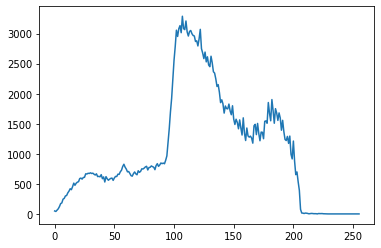

In [8]:
img = cv2.imread("./img/mountain.jpg", cv2.IMREAD_GRAYSCALE)
cv2.imshow("img", img)

hist = cv2.calcHist([img], [0], None, [256], [0,256])
plt.plot(hist)

plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()

[array([[189, 187, 188, ..., 189, 189, 189],
       [191, 188, 187, ..., 189, 189, 188],
       [189, 189, 188, ..., 190, 189, 190],
       ...,
       [ 85,  91,  91, ..., 116, 146, 137],
       [ 85,  92,  90, ..., 146, 115, 146],
       [ 84,  90,  92, ..., 157, 138, 131]], dtype=uint8), array([[105, 103, 107, ..., 112, 111, 112],
       [107, 104, 106, ..., 112, 112, 111],
       [105, 105, 104, ..., 113, 112, 113],
       ...,
       [ 49,  55,  55, ..., 115, 155, 146],
       [ 49,  56,  54, ..., 154, 115, 152],
       [ 48,  54,  56, ..., 165, 143, 129]], dtype=uint8), array([[ 39,  37,  40, ...,  50,  52,  49],
       [ 41,  38,  39, ...,  50,  50,  49],
       [ 40,  40,  39, ...,  50,  49,  50],
       ...,
       [ 25,  31,  31, ..., 119, 158, 149],
       [ 25,  32,  30, ..., 161, 121, 157],
       [ 24,  30,  32, ..., 164, 142, 129]], dtype=uint8)]


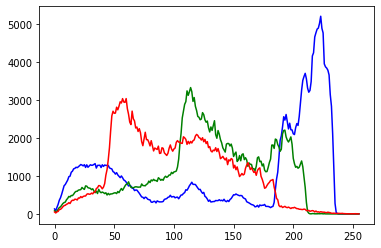

In [18]:
## 컬러 히스토그램
img = cv2.imread("./img/mountain.jpg")
cv2.imshow("img", img)

channels=cv2.split(img)
print(channels)
colors = ("b","g","r")

for (ch, color) in zip(channels, colors):
    hist = cv2.calcHist([ch], [0], None, [256], [0,256])
    plt.plot(hist, color = color)

cv2.waitKey(0)
cv2.destroyAllWindows()

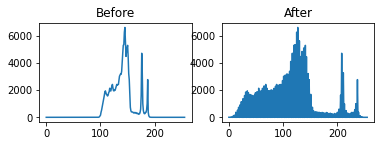

In [40]:
## 노말라이즈(정규화) = 조금더 선명하게 만들어줌.

img = cv2.imread("./img/abnormal.jpg", cv2.IMREAD_GRAYSCALE)
cv2.imshow("img", img)
img_norm=cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX) 
cv2.imshow("img_norm", img_norm)

hist = cv2.calcHist([img], [0], None, [256], [0, 255])
hist_1 = cv2.calcHist([img_norm], [0], None, [256], [0, 255])

hists = {"Before": hist, "After": hist_1}
for i, (k,v) in enumerate(hists.items()):
    plt.subplot(2,2, i+1)
    plt.title(k)
    plt.plot(v)

plt.show() 
cv2.waitKey(0)
cv2.destroyAllWindows()   

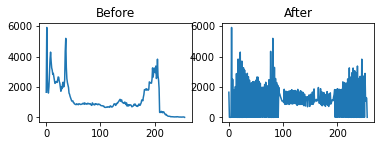

In [48]:
img = cv2.imread("./img/yate.jpg", cv2.IMREAD_GRAYSCALE)
cv2.imshow("img",img)
img3=cv2.equalizeHist(img) #밝기 개선
cv2.imshow("img3",img3)

hist = cv2.calcHist([img], [0], None, [256], [0,255])
hist1 = cv2.calcHist([img3], [0], None, [256], [0,255])
hists = {"Before": hist, "After": hist1}
for i, (k,v) in enumerate(hists.items()):
    plt.subplot(2,2, i+1)
    plt.title(k)
    plt.plot(v)
cv2.waitKey(0)
cv2.destroyAllWindows() 

In [52]:
## 컬러이미지 밝기 개선
img = cv2.imread("./img/yate.jpg")
cv2.imshow("img", img)
img_yuv=cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
cv2.imshow("img_yuv", img_yuv)
img_yuv[:,:,0]=cv2.equalizeHist(img_yuv[:,:,0]) #첫번쨰 채널에 대해서 이퀄라이즈 적용함
cv2.imshow("img_yuv2", img_yuv)

img2=cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)
cv2.imshow("img2", img2)
cv2.waitKey(0)
cv2.destroyAllWindows() 

In [56]:
## 부분 이퀄라이즈 CLAHE
img = cv2.imread("./img/bright.jpg")
img_yuv=cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
cv2.imshow("img", img)
#이퀄라이즈
img_eq = img_yuv.copy()
img_eq[:,:,0]=cv2.equalizeHist(img_eq[:,:,0])
img_eq=cv2.cvtColor(img_eq, cv2.COLOR_YUV2BGR)
cv2.imshow("img_eq", img_eq)

#CLAHE적용하기
img_clahe=img_yuv.copy()
clahe=cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
img_clahe[:,:,0] = clahe.apply(img_clahe[:,:,0])
img_clahe=cv2.cvtColor(img_clahe, cv2.COLOR_YUV2BGR)
cv2.imshow("img_clahe", img_clahe)
cv2.waitKey(0)
cv2.destroyAllWindows() 

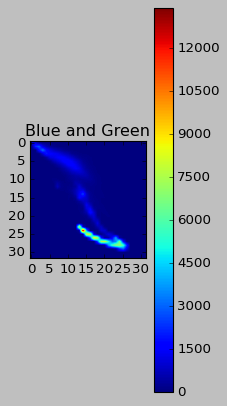

In [57]:
## 2D 히스토그램 만들기
plt.style.use("classic")
img = cv2.imread("./img/mountain.jpg")

plt.subplot(131)
hist = cv2.calcHist([img], [0,1], None, [32,32], [0,256,0,256])
p = plt.imshow(hist)
plt.title("Blue and Green")
plt.colorbar(p)
plt.show()

In [62]:
## 마우스로 선택한 영역의 물체 배경 제거하기

win_name = "back_projection"
img = cv2.imread("./img/pump_horse.jpg")
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
draw=img.copy()

def masking(bp, win_name):
    disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
    cv2.filter2D(bp,-1,disc, bp)
    _, mask = cv2.threshold(bp, 1, 255, cv2.THRESH_BINARY)
    result=cv2.bitwise_and(img, img, mask = mask)
    cv2.imshow(win_name, result)

def backProjection_manual(hist_roi):
    hist_img = cv2.calcHist([hsv_img], [0,1], None, [180,256], [0,180,0,256])
    hist_rate = hist_roi / (hist_img+1)
    
    h,s,v = cv2.split(hsv_img)
    bp = hist_rate[h.ravel(), s.ravel()]
    bp = np.minimum(bp,1)
    bp = bp.reshape(hsv_img.shape[:2])
    cv2.normalize(bp,bp,0,255,cv2.NORM_MINMAX)
    bp = bp.astype(np.uint8)
    
    masking(bp,"result_manual")

#opencv로 구현한 함수
def backProjection_cv(hist_roi):
    bp = cv2.calcBackProject([hsv_img], [0,1], hist_roi, [0,180,0,256], 1)
    masking(bp,"result_cv")
    
#ROI 선택
(x,y,w,h) = cv2.selectROI(win_name, img, False)
if w>0 and h>0:
    roi = draw[y:y+h, x:x+w]
    cv2.rectangle(draw, (x,y), (x+w, y+h), (0,0,255), 2)
    
    hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
    hist_roi = cv2.calcHist([hsv_roi], [0,1], None, [180,256], [0,180,0,256])
    backProjection_cv(hist_roi)
    backProjection_manual(hist_roi)
    
cv2.imshow(win_name,draw)
cv2.waitKey()
cv2.destroyAllWindows()